<a href="https://colab.research.google.com/github/maalpi/Analise-Crimes/blob/main/AnaliseCrimesLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de crime em Los Angeles
Los Angeles, Califórnia 😎. A Cidade dos Anjos. Cidade de Ouropel. A Capital Mundial do Entretenimento!

Conhecida por seu clima quente, palmeiras, litoral extenso e Hollywood, além de produzir alguns dos filmes e músicas mais icônicos. No entanto, como acontece com qualquer cidade altamente populosa, nem sempre é glamorosa e pode haver um grande volume de crimes. É aí que você pode ajudar!

Você foi solicitado a apoiar o Departamento de Polícia de Los Angeles (LAPD) analisando dados criminais para identificar padrões de comportamento criminoso. Eles planejam usar seus insights para alocar recursos de forma eficaz para combater vários crimes em diferentes áreas.

1. Qual horário tem maior frequência de crimes? Armazene como uma variável inteira chamada peak_crime_hour.

2. Qual área tem maior frequência de crimes noturnos (crimes cometidos entre 22h e 3h59)? Salve como uma variável de string chamada peak_night_crime_location.

3. Identifique o número de crimes cometidos contra vítimas por faixa etária (0–17, 18–25, 26–34, 35–44, 45–54, 55–64, 65+). Salve como uma série de pandas chamada Victim_ages.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
crimes = pd.read_csv("./sample_data/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
peak_crime_hour = crimes['TIME OCC'].value_counts(ascending=False)
peak_crime_hour = int(peak_crime_hour.index[0])

# Convertendo para um horario comercial
peak_crime_hour = peak_crime_hour // 100

print(peak_crime_hour)

12


Central


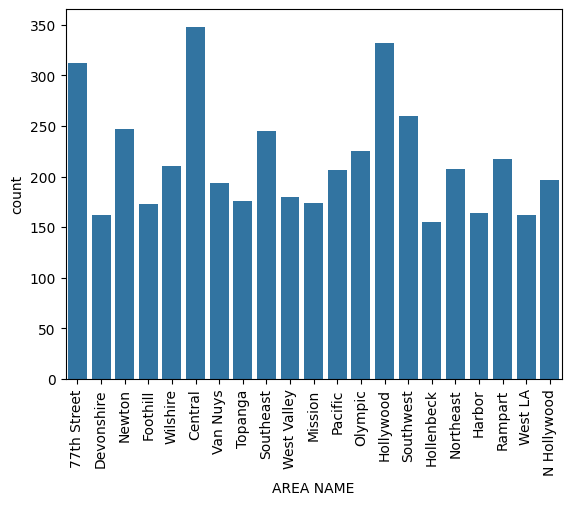

In [4]:
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int)
crimes2 = crimes[((crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC']<= 359))]
sns.countplot(data=crimes2,x='AREA NAME')
plt.xticks(rotation=90)
crimes2 = crimes2['AREA NAME'].value_counts(ascending=False)
peak_night_crime_location = crimes2.index[0]
print(peak_night_crime_location)
plt.show()

In [5]:
label = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
crimes['age_bracket'] = pd.cut(crimes['Vict Age'], bins=bins, labels=label)
victim_ages = crimes['age_bracket'].value_counts()
print(victim_ages)

age_bracket
26-34    5327
35-44    4884
45-54    3365
18-25    3219
55-64    2441
65+      1654
0-17      545
Name: count, dtype: int64
